In [2]:
import pandas as pd
import numpy as np
import bz2
import re
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
import seaborn as sns

In [3]:
real_news = pd.read_csv('/Users/palas/Downloads/archive-fake-news/True.csv')
real_news['label'] = 1
real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [4]:
real_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
fake_news = pd.read_csv('/Users/palas/Downloads/archive-fake-news/Fake.csv')
fake_news['label'] = 0
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [6]:
pd.set_option('max_colwidth', True)

In [7]:
news = pd.concat([real_news, fake_news], ignore_index = True, sort = False).sample(frac=1, random_state=42 )
news.head(1)

,title,text,subject,date,label
22216,"BREAKING: GOP Chairman Grassley Has Had Enough, DEMANDS Trump Jr. Testimony","Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all of this. To them, it s fake news, or a hoax. However, the facts bear things out differently, and it seems that there are now cracks in the Congressional public leadership.Chuck Grassley (R-Iowa), who heads the Senate Judiciary Committee, is fed up. He is now demanding that Donald Trump, Jr. and former 2016 Trump Campaign Manager Paul Manafort testify before his committee regarding the now infamous shady meeting between Donald Trump and the shady Russian lawyer who promised dirt on 2016 Democratic Presidential nominee Hillary Clinton. In fact, this information is due, well, NOW. This demand sends a few signals to team Trump most notably that they should not fire Special Counsel Robert Mueller under any circumstances, despite the fact that it seems that this seems to be what Trump s White House is laying the groundwork, so to speak, to do as we speak.Here is the tweet regarding Grassley s warning:Also, anyone who thinks that Senator Grassley and the rest of the Senate are not serious about this only needs to look at the warning that has already been given: Trump Jr. and Manafort will either follow orders, or be served with subpoenas that force them to comply. If they refuse, they will be held in contempt of Congress, which carries with it serious jail time.Even the cruel, craven creatures within the GOP are sick of Donald Trump s corruption and his scandal-ridden White House. They are angry that he staged a hostile takeover of their party, first with birtherism and giving them a permanently racist label all while decimating all efforts that were made to pretend the Republican Party isn t a hotbed of racism, and while turning their worlds upside down, and with it, the nation. It seems that old-timers like Grassley, who are clearly sick of Trump s bullshit, just might be the ones who could save the republic. All they need is a bit of courage.Featured image via Win McNamee/Getty Images",News,"July 21, 2017",0


In [8]:
news.tail(1)

,title,text,subject,date,label
15795,U.N. refugee commissioner says Australia must stop 'unfolding humanitarian crisis' in PNG,"SYDNEY (Reuters) - The U.N. High Commissioner for Refugees said Australia must take immediate action to stop an unfolding humanitarian emergency that sees 600 asylum seekers barricaded inside an abandoned detention center in Papua New Guinea without food or running water. The detainees in the Manus Island Centre have for two days defied attempts by Australia and Papua New Guinea to close the camp, saying they fear violent reprisals from the local community if they are moved to other transit centers . With food all but exhausted, many of the men are beginning to show the ill-effects of two-days without adequate nourishment, an environment the U.N. refugee commissioner said Australia must urgently resolve with Papua New Guinea. Australia remains responsible for the well-being of all those moved to Papua New Guinea until adequate, long-term solutions outside the country are found, the U.N. body said in a statement on Thursday. The Manus center has been a key part of Australia s controversial Sovereign Borders immigration policy, which refuses to allow asylum seekers arriving by boat to reach its shores, detaining them in camps in Papua New Guinea and Nauru in the South Pacific. The United Nations and rights groups have for years cited human rights abuses among detainees in the centers. Papua New Guinea s High Court ruled last year that the Manus center, first opened in 2001, was illegal and the camp was scheduled to close on Oct. 31, when security staff withdrew. The 600 men in the camp have no water and power after utilities to the camp were cut off on Wednesday. Desperate to source alternative supplies, dozens of men worked during the night, using wooden poles to dig deep holes to find water, using torches to light their task, photos supplied to Reuters showed. Without running water, advocates fear a rapid decline in sanitary conditions of the camp. Behrouz Boochani, a Kurdish journalist from Iran, said the men were not on a hunger strike and called on the Red Cross and Medicines Sans Frontiers (MSF) to provide help. MSF said in a statement to Reuters that it was deeply concerned and saddened and that Australia and Papua New Guinea are responsible for the care to the detainees. Australia has said the men should move to new transit centers and has pledged A$250 million ($193 million) worth of food and security for the next 12 months. But the U.N. refugee commissioner said one of the new facilities was still a makeshift camp composed of shipping containers. Containers are surrounded by mud and do not have electrical or water connections as yet, it said. The relocation of the men is designed as a temporary measure, allowing the United States time to complete vetting of refugees as part of a refugee swap deal. Those not accepted by the United States have the option of being resettled in Papua New Guinea, but none wish to stay, or another developing country. Lawyers for the detainees have filed a suit in Papua New Guinea s Supreme Court to prevent the Manus camp s closure and for services to be returned. A ruling is expected later on Thursday, although it has been delayed for more than two days already. Most of the detainees come from war-torn countries such as Afghanistan, Iran, Myanmar, Pakistan, Sri Lanka and Syria.",worldnews,"November 1, 2017",1


In [9]:
news['date'] = news['date'].str.replace('Dec ', 'December ')
news['date'] = news['date'].str.replace('Nov ', 'November ')
news['date'] = news['date'].str.replace('Oct ', 'October ')
news['date'] = news['date'].str.replace('Sep ', 'September ')
news['date'] = news['date'].str.replace('Aug ', 'August ')
news['date'] = news['date'].str.replace('Jul ', 'July ')
news['date'] = news['date'].str.replace('Jun ', 'June ')
news['date'] = news['date'].str.replace('Apr ', 'April ')
news['date'] = news['date'].str.replace('Mar ', 'March ')
news['date'] = news['date'].str.replace('Feb ', 'February ')
news['date'] = news['date'].str.replace('Jan ', 'January ')

In [10]:
news['date'] = news['date'].str.replace(' ', '')

In [11]:
news['date'] = pd.to_datetime(news['date'], format='%B%d,%Y', errors = 'coerce')

In [12]:

news['date'] = news['date'].astype('datetime64')
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 22216 to 15795
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  44898 non-null  object        
 3   date     44853 non-null  datetime64[ns]
 4   label    44898 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.1+ MB


In [13]:
news['year'] = news['date'].dt.year
news['month'] = news['date'].dt.month

news.head(1)

,title,text,subject,date,label,year,month
22216,"BREAKING: GOP Chairman Grassley Has Had Enough, DEMANDS Trump Jr. Testimony","Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all of this. To them, it s fake news, or a hoax. However, the facts bear things out differently, and it seems that there are now cracks in the Congressional public leadership.Chuck Grassley (R-Iowa), who heads the Senate Judiciary Committee, is fed up. He is now demanding that Donald Trump, Jr. and former 2016 Trump Campaign Manager Paul Manafort testify before his committee regarding the now infamous shady meeting between Donald Trump and the shady Russian lawyer who promised dirt on 2016 Democratic Presidential nominee Hillary Clinton. In fact, this information is due, well, NOW. This demand sends a few signals to team Trump most notably that they should not fire Special Counsel Robert Mueller under any circumstances, despite the fact that it seems that this seems to be what Trump s White House is laying the groundwork, so to speak, to do as we speak.Here is the tweet regarding Grassley s warning:Also, anyone who thinks that Senator Grassley and the rest of the Senate are not serious about this only needs to look at the warning that has already been given: Trump Jr. and Manafort will either follow orders, or be served with subpoenas that force them to comply. If they refuse, they will be held in contempt of Congress, which carries with it serious jail time.Even the cruel, craven creatures within the GOP are sick of Donald Trump s corruption and his scandal-ridden White House. They are angry that he staged a hostile takeover of their party, first with birtherism and giving them a permanently racist label all while decimating all efforts that were made to pretend the Republican Party isn t a hotbed of racism, and while turning their worlds upside down, and with it, the nation. It seems that old-timers like Grassley, who are clearly sick of Trump s bullshit, just might be the ones who could save the republic. All they need is a bit of courage.Featured image via Win McNamee/Getty Images",News,2017-07-21,0,2017.0,7.0


In [14]:
yearly_news_fall = news[['date', 'label']]
yearly_news_fall = news.groupby(['date'])['label'].count()
yearly_news_fall = pd.DataFrame(yearly_news_fall)
yearly_news_fall

,label
date,
2015-03-31,8
2015-04-01,2
2015-04-02,1
2015-04-04,5
2015-04-05,13
...,...
2017-12-27,78
2017-12-28,11
2017-12-29,26


Text(0.5, 1.0, 'yearly news timeline')

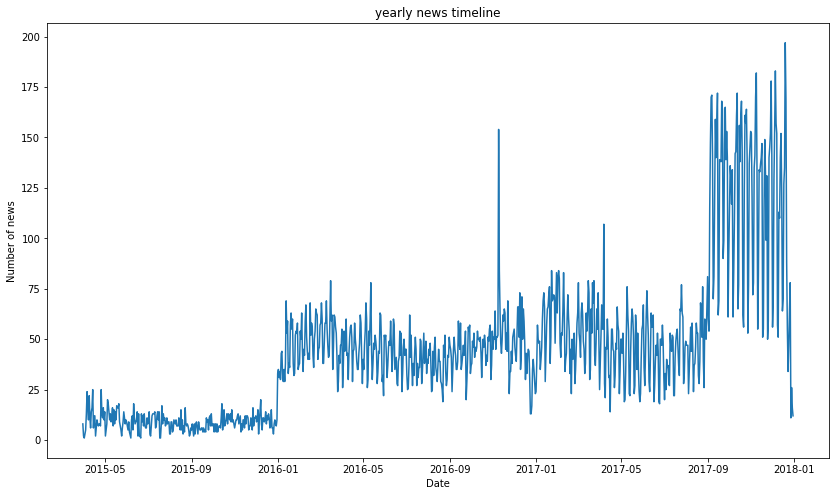

In [15]:

plt.figure(figsize=(14, 8))
plt.ylabel('Number of news')
plt.xlabel('Date')
plt.plot(yearly_news_fall.index, yearly_news_fall.values)
plt.title("yearly news timeline")

0    23481
1    21417
Name: label, dtype: int64


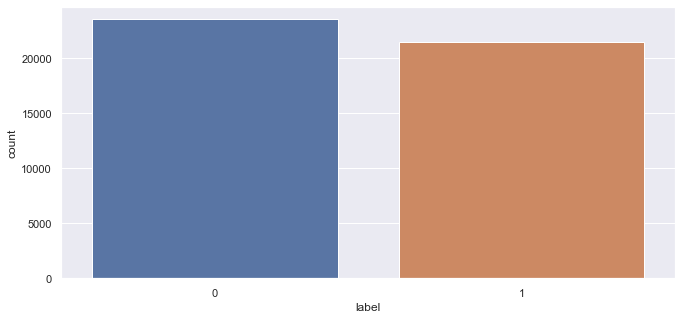

In [16]:
sns.set(rc={'figure.figsize':(11,5)})
sns.countplot(x= news.label)

print(news["label"].value_counts())

Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

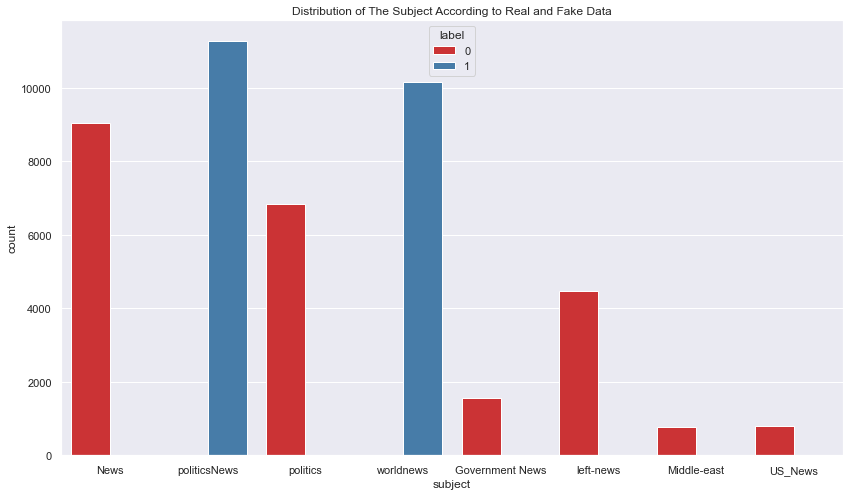

In [17]:
plt.figure(figsize=(14, 8))

sns.countplot(x="subject",  hue='label', data=news, palette="Set1")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [18]:
news.isna().sum()

title      0 
text       0 
subject    0 
date       45
label      0 
year       45
month      45
dtype: int64

In [19]:
news.label.value_counts()

0    23481
1    21417
Name: label, dtype: int64

In [23]:
news_replica = news.copy()

In [24]:
news_replica['news_stream'] = news_replica['subject'] + " " + news_replica['title'] + " " + news_replica['text']
news_replica.drop(['title', 'text', 'subject','date','year','month'], axis=1, inplace=True)

In [25]:
news_replica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 22216 to 15795
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        44898 non-null  int64 
 1   news_stream  44898 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [24]:
news_replica.head(1)

label  \
0  1       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [27]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

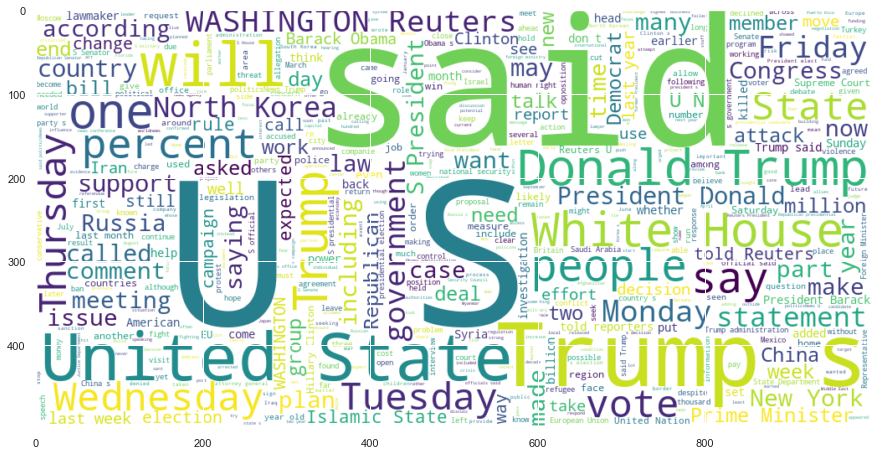

In [31]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 ,background_color = 'white', stopwords = STOPWORDS).generate(" ".join(news_replica[news_replica.label == 1].news_stream))
plt.imshow(wc , interpolation = 'bilinear')

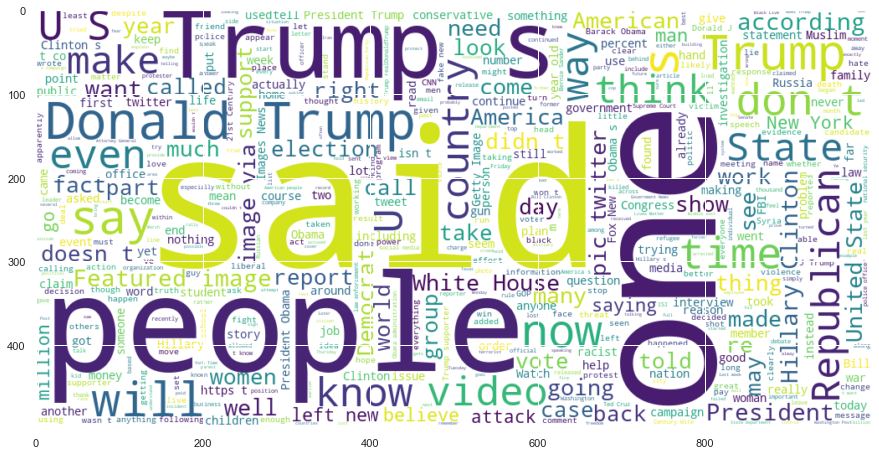

In [30]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500, background_color = 'white' , stopwords = STOPWORDS).generate(" ".join(news_replica[news_replica.label == 0].news_stream))
plt.imshow(wc , interpolation = 'bilinear')

In [32]:
lemma = nltk.WordNetLemmatizer()
corpus = []

for i in range(0, len(news_replica)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', news_replica['news_stream'][i])
    review = review.lower()
    review = nltk.word_tokenize(review)
    
    review = [lemma.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

4
41565
41566
41567
41568
41569
41570
41571
41572
41573
41574
41575
41576
41577
41578
41579
41580
41581
41582
41583
41584
41585
41586
41587
41588
41589
41590
41591
41592
41593
41594
41595
41596
41597
41598
41599
41600
41601
41602
41603
41604
41605
41606
41607
41608
41609
41610
41611
41612
41613
41614
41615
41616
41617
41618
41619
41620
41621
41622
41623
41624
41625
41626
41627
41628
41629
41630
41631
41632
41633
41634
41635
41636
41637
41638
41639
41640
41641
41642
41643
41644
41645
41646
41647
41648
41649
41650
41651
41652
41653
41654
41655
41656
41657
41658
41659
41660
41661
41662
41663
41664
41665
41666
41667
41668
41669
41670
41671
41672
41673
41674
41675
41676
41677
41678
41679
41680
41681
41682
41683
41684
41685
41686
41687
41688
41689
41690
41691
41692
41693
41694
41695
41696
41697
41698
41699
41700
41701
41702
41703
41704
41705
41706
41707
41708
41709
41710
41711
41712
41713
41714
41715
41716
41717
41718
41719
41720
41721
41722
41723
41724
41725
41726
41727
41728
41729
41730
41

In [33]:
import pickle

pickle_out = open("corpus.pickle","wb")
pickle.dump(corpus, pickle_out)
pickle_out.close()

In [34]:
print(len(corpus))
print(corpus[1])

44898
politicsnews u military accept transgender recruit monday pentagon washington reuters transgender people allowed first time enlist u military starting monday ordered federal court pentagon said friday president donald trump administration decided appeal ruling blocked transgender ban two federal appeal court one washington one virginia last week rejected administration request put hold order lower court judge requiring military begin accepting transgender recruit jan justice department official said administration challenge ruling department defense announced releasing independent study issue coming week rather litigate interim appeal occurs administration decided wait dod study continue defend president lawful authority district court meantime official said speaking condition anonymity september pentagon said created panel senior official study implement directive trump prohibit transgender individual serving defense department feb submit plan trump lawyer representing currently

In [35]:
texts = np.array(corpus)

In [38]:
labels = np.array(news_replica.label)

In [41]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(texts, labels, test_size= 0.3, random_state= 42)

In [43]:
max_len = round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))
max_len

244

In [45]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


max_vocab_len = 10000

text_vector = TextVectorization(max_tokens = max_vocab_len, 
                                standardize = "lower_and_strip_punctuation",
                                split = 'whitespace',
                                ngrams = None,
                                output_mode = 'int',
                                output_sequence_length = max_len,
                                pad_to_max_tokens = True,
                                vocabulary = None)



In [46]:
#fit the text vector to the training text
text_vector.adapt(train_sentences)

In [47]:
random_sentence = random.choice(train_sentences)
print(f"original text : \n {random_sentence} \n\n Vectorized format : \n{text_vector([random_sentence])} \n\n shape : {text_vector([random_sentence]).shape}")

original text : 
 worldnews merkel preaches tolerance religious freedom reformation ceremony wittenberg germany reuters invoking spirit reformation chancellor angela merkel called religious freedom tolerance tuesday said germany lend extra support child refugee experienced awful thing learned tolerance soul europe said ceremony th anniversary reformation wittenberg martin luther said nailed thesis challenging catholicism church door luther argued saw abusive practice catholic preacher though reformation divided western christianity resulted violence persecution discrimination merkel daughter protestant pastor praised luther translation bible standard form written german said made teaching accessible population large religious education fundamental concern reformation said stressing importance education everyone learn develop skill child need given support others example parental support lacking applies integrating child refugee family experienced undergone awful thing merkel come fire 

In [48]:
print(f" 5 most common words : {text_vector.get_vocabulary()[:5]} \n \n 5 least common words : {text_vector.get_vocabulary()[-5:]}")

 5 most common words : ['', '[UNK]', 'trump', 'said', 'u'] 
 
 5 least common words : ['dividend', 'distorted', 'discrepancy', 'dilemma', 'dictionary']


In [50]:
#Embedding layer

embedding = layers.Embedding(input_dim = max_vocab_len, 
                      output_dim = 128,
                      embeddings_initializer= 'uniform',
                      input_length = max_len)


In [51]:
print(f"original text : \n {random_sentence} \n\n Embedded format : \n{embedding(text_vector([random_sentence]))} \n\n shape : {embedding(text_vector([random_sentence])).shape}")

original text : 
 worldnews merkel preaches tolerance religious freedom reformation ceremony wittenberg germany reuters invoking spirit reformation chancellor angela merkel called religious freedom tolerance tuesday said germany lend extra support child refugee experienced awful thing learned tolerance soul europe said ceremony th anniversary reformation wittenberg martin luther said nailed thesis challenging catholicism church door luther argued saw abusive practice catholic preacher though reformation divided western christianity resulted violence persecution discrimination merkel daughter protestant pastor praised luther translation bible standard form written german said made teaching accessible population large religious education fundamental concern reformation said stressing importance education everyone learn develop skill child need given support others example parental support lacking applies integrating child refugee family experienced undergone awful thing merkel come fire 

In [62]:
inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vector(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences = True, recurrent_dropout = 0.25, dropout = 0.25)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(32, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
lstm = tf.keras.Model(inputs, outputs, name = 'LSTM_MODEL')




# model_lstm = tf.keras.Sequential([
#     tf.keras.layers.Embedding(v_size+1, embed_size, input_length = max_len, trainable = False),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, recurrent_dropout = 0.25, dropout = 0.25, return_sequences = True)),

#     tf.keras.layers.Dense(64, activation = 'relu'),
#     tf.keras.layers.Dense(32, activation = 'relu'),
#     tf.keras.layers.Dense(1, activation = 'sigmoid')
# ])

# model_lstm.compile('adam', 'binary_crossentropy', metrics = ['accuracy'])
# model_lstm.summary()

# history_lstm = model_lstm.fit(train_seq, train_labels, batch_size = 32, epochs = 20, validation_data = (test_seq, test_labels), verbose = 2)

In [63]:
lstm.summary()

Model: "LSTM_MODEL"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 244)               0         
_________________________________________________________________
embedding (Embedding)        (None, 244, 128)          1280000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 244, 64)           49408     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3

In [64]:
lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

lstm_history = lstm.fit(train_sentences, train_labels,  batch_size = 32, epochs = 5, validation_data = (val_sentences, val_labels))

Epoch 1/5
373/983 [==========>...................] - ETA: 12:16 - loss: 0.5994 - accuracy: 0.6187

KeyboardInterrupt: 

In [65]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vector(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 244)               0         
_________________________________________________________________
embedding (Embedding)        (None, 244, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 240, 32)           20512     
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,300,545
Trainable params: 1,300,545
Non-trainable params: 0
__________________________________________

In [66]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
983/983 [==============================] - 102s 99ms/step - loss: 0.6930 - accuracy: 0.5232 - val_loss: 0.6967 - val_accuracy: 0.5037
Epoch 2/5
983/983 [==============================] - 97s 98ms/step - loss: 0.6375 - accuracy: 0.6827 - val_loss: 0.7231 - val_accuracy: 0.5001
Epoch 3/5
254/983 [======>.......................] - ETA: 1:10 - loss: 0.4908 - accuracy: 0.8521

KeyboardInterrupt: 

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [18]:
word_index = tokenizer.word_index
v_size = len(word_index)

In [19]:
max_len = 300
max_features = 10000
padding_type = 'pre'
embed_size = 100

sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, maxlen = max_len, padding = padding_type)

In [20]:

test_portion = 0.1
training_size = 30000

split = int(test_portion * training_size)

test_seq = padded[0:split]
train_seq = padded[split: training_size]
test_labels = labels[0:split]
train_labels = labels[split:training_size]

In [21]:
test_seq = np.array(test_seq)
train_seq = np.array(train_seq)

In [22]:
train_labels.shape

(27000,)

In [23]:
print(v_size)
print(word_index['news'])

107413
11


In [24]:

tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
tpu_strata = tf.distribute.experimental.TPUStrategy(tpu)

In [25]:
BATCH_SIZE = 16* tpu_strata.num_replicas_in_sync
with tpu_strata.scope():
    model_lstm = tf.keras.Sequential([
        tf.keras.layers.Embedding(v_size+1, embed_size, input_length = max_len, trainable = False),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, recurrent_dropout = 0.25, dropout = 0.25)),
    
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model_lstm.compile('adam', 'binary_crossentropy', metrics = ['accuracy'], steps_per_execution=16)
    model_lstm.summary()

history_lstm = model_lstm.fit(train_seq, train_labels, batch_size = BATCH_SIZE, epochs = 20, validation_data = (test_seq, test_labels), verbose = 2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          10741400  
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               234496    
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 10,994,457
Trainable params: 253,057
Non-trainable params: 10,741,400
_________________________________________________________________
Epoch 1/20
211/211 - 29s - loss: 0.2207 - accuracy: 0.9166 - val_loss: 0.0102 - val_accuracy: 0.9983
Epo

<Figure size 432x288 with 0 Axes>

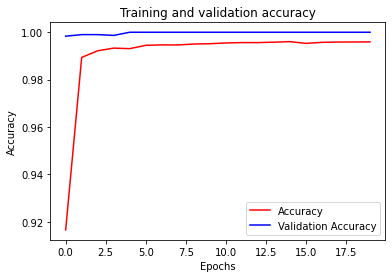

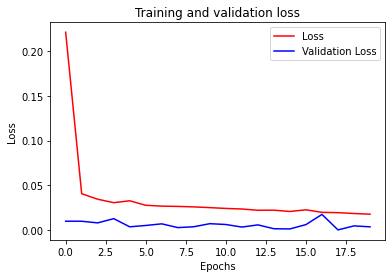

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.image  as mpimg

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history_lstm.history['accuracy']
val_acc=history_lstm.history['val_accuracy']
loss=history_lstm.history['loss']
val_loss=history_lstm.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

In [28]:
print("Accuracy of the model on Training Data is - " , model_lstm.evaluate(train_seq, train_labels)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model_lstm.evaluate(test_seq, test_labels)[1]*100 , "%")

844/844 [==============================] - 8s 10ms/step - loss: 0.0147 - accuracy: 0.9964
Accuracy of the model on Training Data is -  99.64073896408081 %
94/94 [==============================] - 1s 12ms/step - loss: 0.0039 - accuracy: 1.0000
Accuracy of the model on Testing Data is -  100.0 %


In [ ]:
# BATCH_SIZE = 16* tpu_strata.num_replicas_in_sync
# with tpu_strata.scope():
#     model_lstm_optimal = tf.keras.Sequential([
#         tf.keras.layers.Embedding(v_size+1, embed_size, input_length = max_len, trainable = False),
#         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, recurrent_dropout = 0.25, dropout = 0.25)),
    
#         tf.keras.layers.Dense(64, activation = 'relu'),
#         tf.keras.layers.Dense(32, activation = 'relu'),
#         tf.keras.layers.Dense(1, activation = 'sigmoid')
#     ])
    
#     lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#         lambda epoch: 1e-8 * 10** (epoch / 20))
#     optimizer = tf.keras.optimizers.SGD(lr = 1e-8, momentum = 0.9)
#     model_lstm_optimal.compile(optimizer=optimizer,loss = tf.keras.losses.Huber(), metrics = ['mae'], steps_per_execution=16)
#     model_lstm_optimal.summary()
    

# history_lstm_o = model_lstm_optimal.fit(train_seq, train_labels, batch_size = BATCH_SIZE, epochs = 100, verbose = 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(corpus, labels,test_size = 0.60, random_state=0)

In [ ]:
y_test.shape

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
max_features = 10000
maxlen = 300
embed_size = 100

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

In [ ]:
training_token = tokenizer.texts_to_sequences(X_train)
testing_token = tokenizer.texts_to_sequences(X_train)

In [ ]:
x_train = pad_sequences(training_token, maxlen = maxlen, padding = 'post')
x_test = pad_sequences(testing_token, maxlen = maxlen, padding = 'post')

In [ ]:
BATCH_SIZE = 16* tpu_strata.num_replicas_in_sync
with tpu_strata.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, embed_size, input_length = maxlen),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv1D(64, 5, activation = 'relu'),
        tf.keras.layers.MaxPooling1D(pool_size = 4),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model.compile('adam', 'binary_crossentropy', metrics = ['accuracy'], steps_per_execution=16)
    model.summary()

history = model.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs = 10, validation_split= 0.4, verbose = 2)

In [ ]:
import matplotlib.image  as mpimg

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100 , "%")